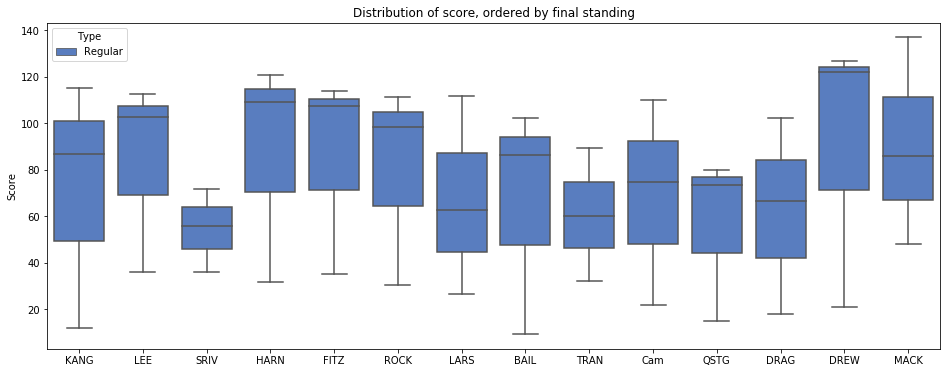

In [1]:
# taken partially from tutorial at: https://stmorse.github.io/journal/espn-fantasy-python.html
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests

league1 = 380134
league2 = 1553391

weeks = 3
scores = {}
for week in range(1,weeks+1):
	r = requests.get('http://games.espn.com/ffl/api/v2/scoreboard', 
		params={'leagueId': league1, 'seasonId': 2018, 'matchupPeriodId': week})
	scores[week] = r.json()

df = []
for key in scores:
    temp = scores[key]['scoreboard']['matchups']
    for match in temp:
        df.append([key, 
                   match['teams'][0]['team']['teamAbbrev'],
                   match['teams'][1]['team']['teamAbbrev'],
                   match['teams'][0]['score'],
                   match['teams'][1]['score']])
df = pd.DataFrame(df, columns=['Week', 'HomeAbbrev', 'AwayAbbrev', 'HomeScore', 'AwayScore'])
df.head()
df = (df[['Week', 'HomeAbbrev', 'HomeScore']]
      .rename(columns={'HomeAbbrev': 'Abbrev', 'HomeScore': 'Score'})
      .append(df[['Week', 'AwayAbbrev', 'AwayScore']]
             .rename(columns={'AwayAbbrev': 'Abbrev', 'AwayScore': 'Score'}))
     )
df['Type'] = pd.Series(['Regular' if w<=14 else 'Playoff' for w in df['Week']])
fig, ax = plt.subplots(1,1, figsize=(16,6))
sns.boxplot(x='Abbrev', y='Score', hue='Type',
               data=df,
               palette='muted')
ax.set_xlabel('')
ax.set_title('Distribution of score, ordered by final standing')
plt.show()
